In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


Bad key text.latex.preview in file C:\Users\Omika\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Omika\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Omika\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

$I_m = C_m \frac{dV}{dt} + I_K + I_{Na} + I_L$

$I_m = C_m \frac{dV}{dt} + g_K (V, t) (V - E_K) + g_{Na} (V, t) (V - E_{Na}) + g_L (V - E_L)$

$I_m = C_m \frac{dV}{dt} + n^4 g_K (V - E_K) + m^3 h g_{Na} (V - E_{Na}) + g_L (V - E_L)$

$\frac{dn}{dt} = \alpha_n (1 - n) + \beta_n n$

$\frac{dm}{dt} = \alpha_m (1 - m) + \beta_m m$

$\frac{dh}{dt} = \alpha_h (1 - h) + \beta_h h$

In [2]:
class HHModel:
    
    #Values of C_m, gmax_Na, gmax_K, g_l, V_Na, V_K,and V_l were experimentally obtained by HH
    
    def __init__(self,C_m=1, gmax_Na=120, gmax_K=36, g_l=0.3, V_Na=115, V_K=-12, V_l=10.613):
        self.C_m = C_m
        self.gmax_Na = gmax_Na
        self.gmax_K = gmax_K
        self.g_l = g_l
        self.V_Na = V_Na
        self.V_K = V_K
        self.V_l = V_l
    
    #Functions for alphas and betas were experimentally determined
    def alpha_n(self,V):
        return 0.01*(-V+10)/(np.exp((-V+10)/10)-1)
    
    def beta_n(self,V):
        return 0.125*np.exp(-V/80)
    
    def alpha_m(self,V):
        return 0.1*(-V+25)/(np.exp((-V+25)/10)-1)
    
    def beta_m(self,V):
        return 4*np.exp(-V/18)
    
    def alpha_h(self,V):
        return 0.07*np.exp(-V/20)
    
    def beta_h(self,V):
        return 1/(np.exp((-V+30)/10)+1)
        
    #Current due to Na, K and leak
    def I_Na(self,V,m,h):
        return (V-self.V_Na)*((m**3)*h*self.gmax_Na)
    
    def I_K(self,V,n):
        return (V-self.V_K)*((n**4)*self.gmax_K)
    
    def I_l(self,V):
        return (V-self.V_l)*(self.g_l)
    
    def I_input(self,t): #In case you want to input your own time-varying current. Specify the function I(t) here
        return 10*(t>100) - 10*(t>200) + 35*(t>300) - 35*(t>400)
    
    @staticmethod
    def diff_eqns(state,t,self,I): #The four simultaneous eqns that must be solved
        
        V, m, h, n = state
        
        #If you want to supply time-variable current, replace I with self.I_input(t)
        
        dVdt = (I - self.I_Na(V,m,h) - self.I_K(V,n) - self.I_l(V))/self.C_m
        
        dmdt = self.alpha_m(V)*(1-m) - self.beta_m(V)*(m)
        dndt = self.alpha_n(V)*(1-n) - self.beta_n(V)*(n)
        dhdt = self.alpha_h(V)*(1-h) - self.beta_h(V)*(h)
        
        return dVdt, dmdt, dhdt, dndt
        
    def run(self,initial_vals,I,t_start=0,t_end=1000,t_interval=0.01,return_vals=False,plot=True):
        
        #initial_vals must be a list of the form [V,m,h,n]
        
        t = np.arange(t_start,t_end,t_interval)
        state = odeint(self.diff_eqns,initial_vals,t,args=(self,I))
        
        V = state[:,0]
        m = state[:,1]
        h = state[:,2]
        n = state[:,3]
        
        I_Na = self.I_Na(V,m,h)
        I_K = self.I_K(V,n)
        I_l = self.I_l(V)
        
        if plot:
            plt.figure(figsize=(18,18))
            
            plt.subplot(3,1,1)
            plt.title("V vs t")
            plt.plot(t,V)
            plt.ylabel("Membrane potential (in mV)")
            plt.xlabel("Time (in ms)")
            
            plt.subplot(3,1,2)
            plt.title("Current vs t")
            plt.plot(t,I_Na,'g',label="Na")
            plt.plot(t,I_K,'b',label="K")
            plt.plot(t,I_l,'r',label="leak")
            plt.ylabel("Current")
            plt.xlabel("Time (in ms)")
            plt.legend()
            
            plt.subplot(3,1,3)
            plt.title("Gating variables")
            plt.plot(t,m,'c',label='m')
            plt.plot(t,n,'y',label='n')
            plt.plot(t,h,'m',label='h')
            plt.ylabel("Value of gating variable")
            plt.xlabel("Time (in ms)")
            plt.legend()
            
            plt.show()
        
        if return_vals:
            return V,m,h,n
                
            

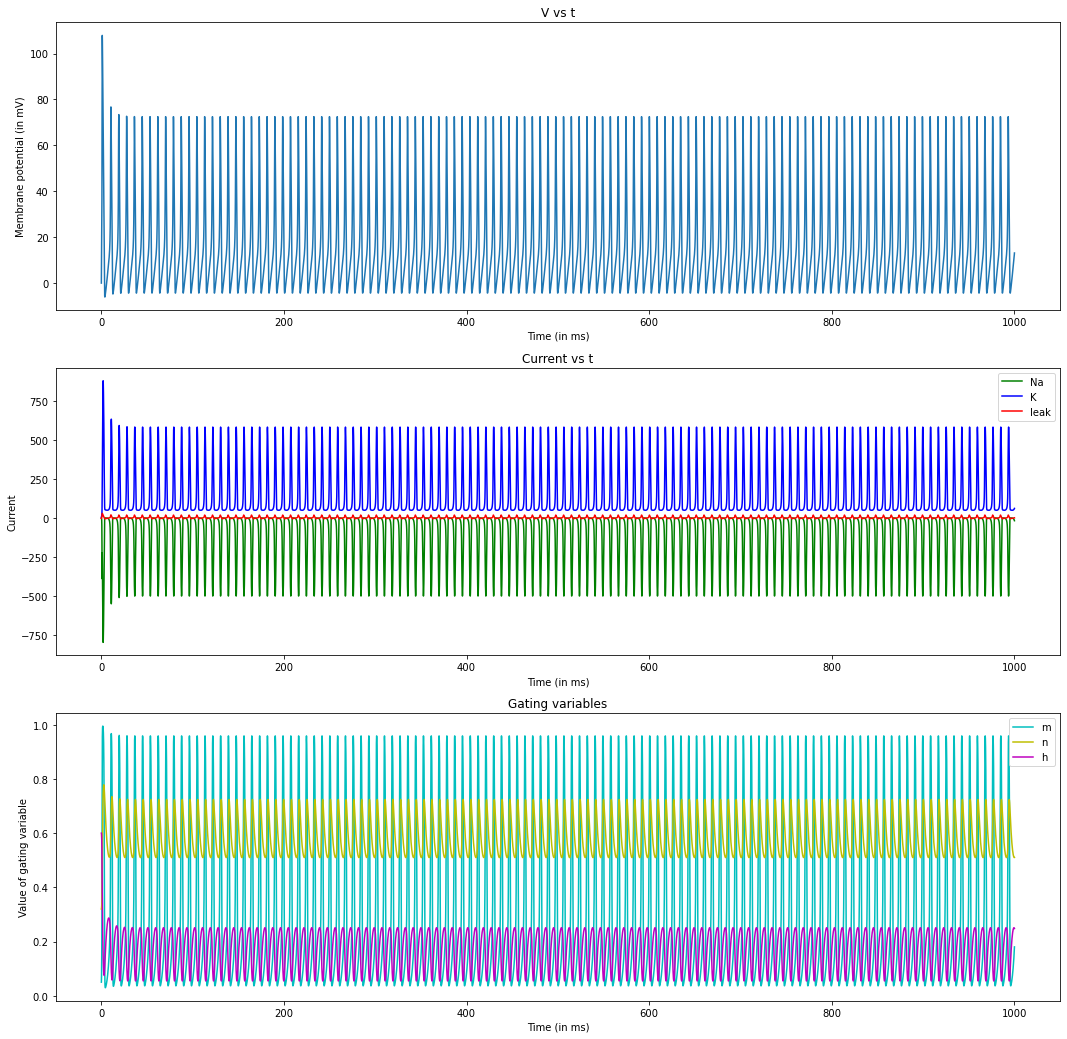

In [3]:
model = HHModel()

#V, m, h, n
initial_vals = [0, 0.05, 0.6, 0.32]

model.run(initial_vals, I = 50, t_start = 0, t_end = 1000, t_interval = 0.01)

**Analysing bifurcations in the Hodgkin Huxley model**

Bifurcations occur in the voltage when the current injected in the model is varied. 

In [13]:
def bifurcation(intial_vals, I_start=0, I_end=20, I_interval=0.1):
    
    Ilist = np.arange(I_start, I_end, I_interval)
    
    V_list = []
    
    for I in Ilist:
        model = HHModel()
        V_vals = model.run(initial_vals, I, return_vals=True, plot=False)[0]
        stable_vals = np.unique(V_vals[len(V_vals)-100:len(V_vals)])
        V_list.append(stable_vals)
        
    x = []
    y = []
    
    for i in range(0, V_list):
        for j in range(0, len(V_list[i])):
            x.append(Ilist[i])
            y.append(V_list[i][j])
    
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y, s=1)
    plt.xlabel("Current")
    plt.ylabel("Stable V values (mV)")
    plt.show()

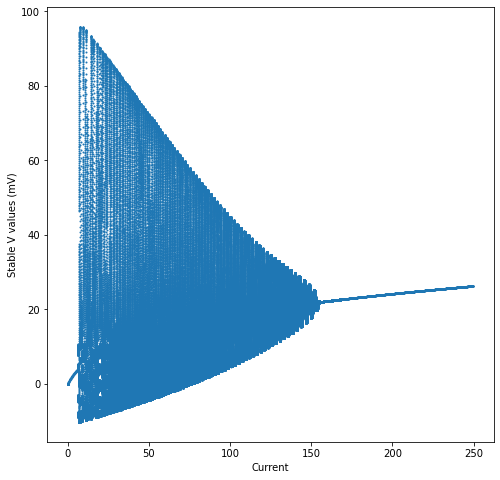

In [20]:
bifurcation(initial_vals, I_end=250, I_interval=0.1)

In [21]:
def max_volt(intial_vals, I_start=0, I_end=20, I_interval=0.1):
    
    I_list = np.arange(I_start, I_end, I_interval)
    
    V_list = []
    
    for I in I_list:
        
        model = HHModel()
        V_vals = model.run(initial_vals, I, return_vals=True, plot=False)[0]
        max_vals = np.max(V_vals[len(V_vals) - 100:len(V_vals)])
        V_list.append(V_vals)
        
    plt.figure(figsize=(8, 8))
    plt.scatter(I_list, V_list, s = 2)
    plt.xlabel("Current")
    plt.ylabel("Maximum V value (mV)")
    plt.show()

ValueError: x and y must be the same size

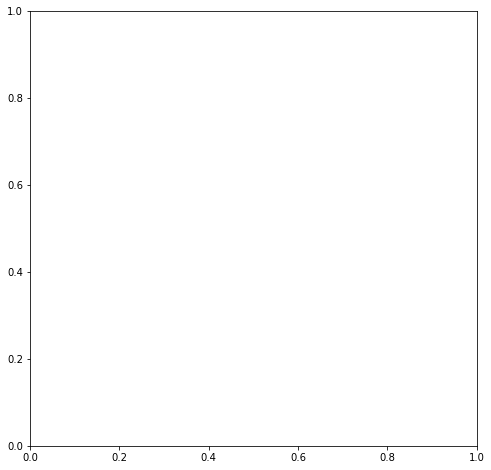

In [23]:
max_volt(initial_vals, I_end = 250, I_interval = 0.1)